In [137]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding,Dropout,BatchNormalization
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from collections import Counter

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid

In [3]:
#!pip install h5py

In [139]:
%%time
entry=[]
fields=[]
references=[]
year=''
index=''
d={'index':[],
  'year':[],
  'references':[]
  }
with open('outputacm.txt','r') as file :
    line=next(file)
    while line :
        if not line.startswith('\n'):
            if line.startswith('#%'):
                references.append(''.join(filter(lambda x: x.isdigit(), line)))
            if line.startswith('#t'):
                year=''.join(filter(lambda x: x.isdigit(),line))
            if line.startswith('#index'):
                index=''.join(filter(lambda x: x.isdigit(),line))
        else :
            d['index'].append(index)
            d['year'].append(year)
            d['references'].append(references)
            references=[]
        line=next(file,None)

df=pd.DataFrame(d)
dd=dict(zip(df['index'],df['year']))

KeyboardInterrupt: 

In [43]:
grouped_by_year=df.groupby('year')['references'].agg(sum).to_frame()
grouped_by_year.tail()

,references
year,
2007,"[207703, 362949, 357613, 226571, 298457, 52492..."
2008,"[248365, 322246, 98581, 185358, 242092, 251593..."
2009,"[298257, 394709, 581170, 253404, 347870, 58216..."
2010,"[302483, 285956, 231951, 309024, 231811, 34414..."
2018,[]


In [44]:
grouped_by_year['references'].apply(lambda z: dict(Counter(z))).to_frame().to_csv('all_pappers_references.csv')

In [45]:
df=pd.read_csv('all_pappers_references.csv',)

In [46]:
import ast
df['references']=df['references'].apply(lambda z: ast.literal_eval(z))
dd=dict(zip(df['year'],df['references']))
diff=pd.DataFrame(dd)

In [47]:
diff=diff.fillna(0)
diff.to_csv('tt.csv')

In [49]:
diff.loc['Total']=diff.sum()
diff.tail()

,1,1900,1941,1947,1949,1950,1951,1952,1953,1954,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2018
99978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,5.0,0.0,0.0
99986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,41945.0,38263.0,22535.0,30777.0,26467.0,43565.0,60260.0,63111.0,480.0,0.0


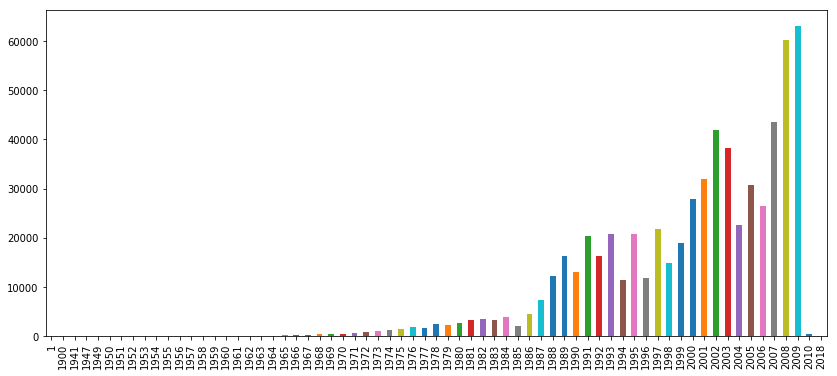

In [50]:
row=diff.iloc[-1]
plt.figure(figsize=(14,6))
row.plot(kind='bar')
plt.show()

In [140]:
df=pd.read_csv('tt.csv')
coll = df.columns.tolist()
df2 = df[coll[17:-1]]
col = df2.columns.tolist()

In [141]:
df2.tail(1)

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
147943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [142]:
#scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(df2)
#df_scaled = pd.DataFrame(data=scaled_data,columns = df2.columns.tolist(), index = df2.index.tolist() )
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2)
#print(x_scaler.data_max_)
df_scaled=pd.DataFrame(scaled_data,columns=col)
df_scaled.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.022222,0.0,0.000000,0.018018,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.022222,0.0,0.014493,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.008065,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.044444,0.0,0.000000,0.018018,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.008065,0.0


In [143]:
print(df2.shape)
print(df_scaled.shape)

(147944, 50)
(147944, 50)


In [144]:
def split_data(data,train_rate=0.8):
    """
    Spliting the dataset to train and test set
    """
    
    msk = np.random.rand(len(data)) < train_rate
    return data[msk],data[~msk]

#train_set,test_set = split_data(df2) #example of usage

In [145]:
def to_seq(data,seq_size,batch_size,f_years = 5):
    """
    Generator function that transforms the data to sequences and return them to batches
    
    data_len the number of articles
    sequence_length number of years that can used for training
    f_years  years predicting into the futu
    """
    
    data_len = data.shape[0] #the number of articles
    sequence_length = data.shape[1]-seq_size-f_years-1 #the number of years that can used for training
    
    while True:
        idx = [random.randint(0,data_len) for i in range(seq_size)]
        
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)
        
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
        for key,row in enumerate(idx):
            obs = data.iloc[row]
            x ,y =[],[]
            for i in range(data.shape[1]-seq_size-f_years-1):
                train_data = obs[i:(i+seq_size)]
                target_data = obs[(i+seq_size):(i+seq_size+f_years)]
                x.append(train_data)
                y.append(target_data)
            
            x_batch[key] = np.array(x)
            y_batch[key] = np.array(y)
            
        yield x_batch,y_batch

seq_size = 9
batch_size = 10
num_x_signals = 9 #random, we can change that
num_y_signals =5

In [146]:

#example of generating a batch
generator=to_seq(df2,seq_size,batch_size)
x,y=next(generator)
print(x.shape)
print(y.shape)


(10, 35, 9)
(10, 35, 5)


In [147]:
def x_loc(data):
    x=[]
    f_years=5
    for i in range(data.shape[0]-seq_size-f_years-1):
        train_data = data[i:(i+seq_size)]
        x.append(train_data)
    return x

def y_loc(data):
    y=[]
    f_years=5
    for i in range(data.shape[0]-seq_size-f_years-1):
        target_data = data[(i+seq_size):(i+seq_size+f_years)]
        y.append(target_data)
    return y

### Create test set

In [148]:
def create_val_set(data):
    '''
    Create validation set to test the model
    '''
    locs = map(lambda x:data.iloc[x],range(data.shape[0]))
    loc_list = np.array(list(locs))
    x = map(x_loc,loc_list)
    y = map(y_loc,loc_list)
    #validation_data =(np.array(list(x)),np.array(list(y)))
    return (np.array(list(x)),np.array(list(y)))

#validation_data = create_val_set(test_set)

## Create the model

In [149]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [150]:
def create_model(unit_size):
    model = Sequential()
    model.add(GRU(units=unit_size,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization()) 
    model.add(Dense(num_y_signals, activation='sigmoid'))
    optimizer = RMSprop(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

#tf_model = create_model(data_key['unit_size'])

In [151]:
def save_model(model,name):
    model_json = model.to_json()
    with open(name+'.json','w') as json_file:
        json_file.write(model_json)
    model.save_weights("model.h5")

In [152]:
data_grid = {
    'unit_size': [128],
    'batch': [10],
    'seq': [9],
    'ep':[100],
    'steps_per_ep':[100]
}
data_search = ParameterGrid(data_grid)


res =[]
res_int=[]

train_set,test_set = split_data(df_scaled)
for count, data_key in enumerate(data_search):
    seq_size = data_key['seq']
    batch_size = data_key['batch']
    num_x_signals = seq_size #random, we can change that
    num_y_signals =5
    res.append('_'.join( str(key) for i,key in data_key.items() ) )

    generator=to_seq(train_set,seq_size,batch_size)
    validation_data = create_val_set(test_set)
    tf_model = create_model(data_key['unit_size'])
    #tf_model.summary()
    tf_model.fit_generator(generator=generator,
                    epochs=data_key['ep'],
                    steps_per_epoch=data_key['steps_per_ep'],
                    validation_data=validation_data,
                    callbacks=callbacks)
    
    res_int.append(tf_model.evaluate(x=validation_data[0],
                        y=validation_data[1]))
    
    save_model(tf_model,res[-1])   
 

print(list(zip(res,res_int)))

Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 0.1010
Epoch 00001: val_loss improved from inf to 0.01280, saving model to 23_checkpoint.keras
100/100 [==============================] - 85s 850ms/step - loss: 0.1001 - val_loss: 0.0128
Epoch 2/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0030
Epoch 00002: val_loss improved from 0.01280 to 0.00028, saving model to 23_checkpoint.keras
100/100 [==============================] - 98s 980ms/step - loss: 0.0030 - val_loss: 2.8353e-04
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 2.3968e-04
Epoch 00003: val_loss improved from 0.00028 to 0.00016, saving model to 23_checkpoint.keras
100/100 [==============================] - 99s 985ms/step - loss: 2.3751e-04 - val_loss: 1.6415e-04
Epoch 4/100
 99/100 [============================>.] - ETA: 0s - loss: 7.9045e-05
Epoch 00004: val_loss improved from 0.00016 to 0.00016, saving model to 23_checkpoint.keras

Epoch 00004: ReduceLROnPlat

In [120]:
x1,h1=create_val_set(test_set)


In [121]:
pred=tf_model.predict(x1)

In [122]:
pred.shape

(29636, 36, 5)